In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df = pd.read_csv(r"C:\WineQT.csv")

In [6]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [7]:
y = np.where(y >= 6, 1, 0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Results
Accuracy: 0.7816593886462883
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       102
           1       0.81      0.80      0.80       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229



In [11]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)
print("\nSGD Classifier Results")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))


SGD Classifier Results
Accuracy: 0.6681222707423581
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       102
           1       0.68      0.77      0.72       127

    accuracy                           0.67       229
   macro avg       0.67      0.66      0.66       229
weighted avg       0.67      0.67      0.66       229



In [12]:
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
print("\nSupport Vector Classifier Results")
print("Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


Support Vector Classifier Results
Accuracy: 0.7685589519650655
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       102
           1       0.79      0.80      0.79       127

    accuracy                           0.77       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229



In [13]:
chemical_features = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "density",
    "pH",
    "quality"
]

df_chem = df[chemical_features]
print(df_chem.describe())

       fixed acidity  volatile acidity  citric acid      density           pH  \
count    1143.000000       1143.000000  1143.000000  1143.000000  1143.000000   
mean        8.311111          0.531339     0.268364     0.996730     3.311015   
std         1.747595          0.179633     0.196686     0.001925     0.156664   
min         4.600000          0.120000     0.000000     0.990070     2.740000   
25%         7.100000          0.392500     0.090000     0.995570     3.205000   
50%         7.900000          0.520000     0.250000     0.996680     3.310000   
75%         9.100000          0.640000     0.420000     0.997845     3.400000   
max        15.900000          1.580000     1.000000     1.003690     4.010000   

           quality  
count  1143.000000  
mean      5.657043  
std       0.805824  
min       3.000000  
25%       5.000000  
50%       6.000000  
75%       6.000000  
max       8.000000  


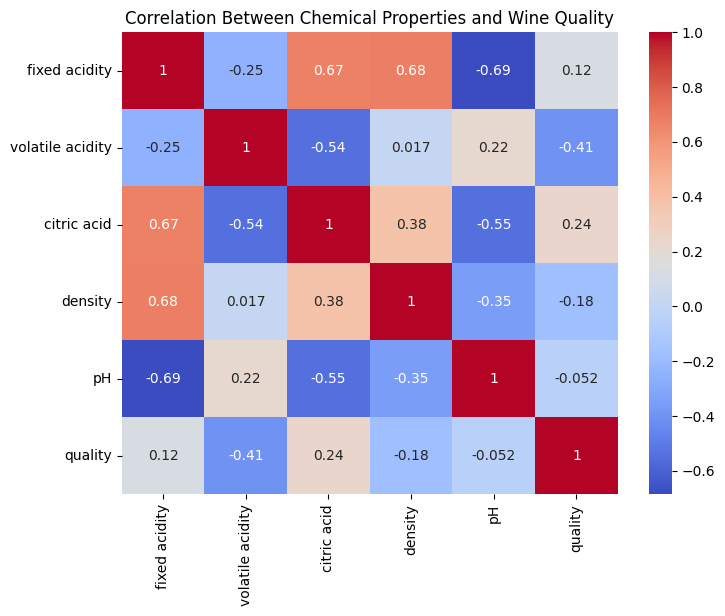

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df_chem.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Chemical Properties and Wine Quality")
plt.show()


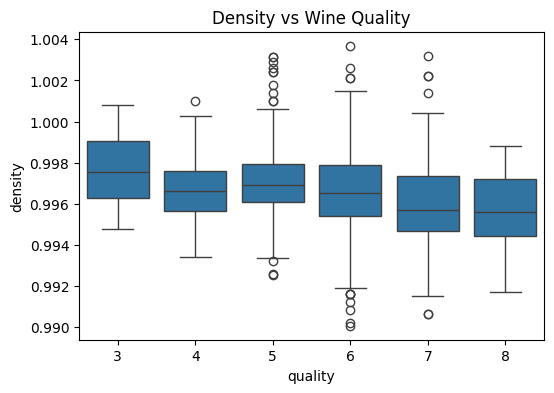

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="density", data=df)
plt.title("Density vs Wine Quality")
plt.show()


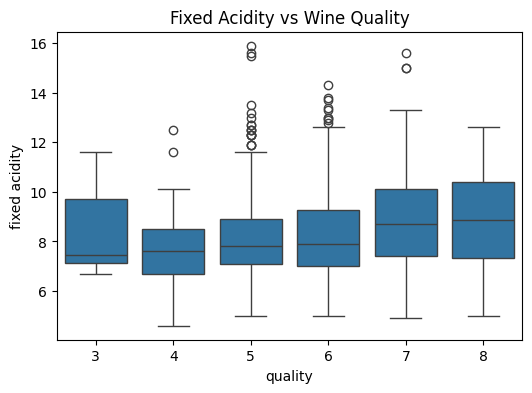

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="fixed acidity", data=df)
plt.title("Fixed Acidity vs Wine Quality")
plt.show()


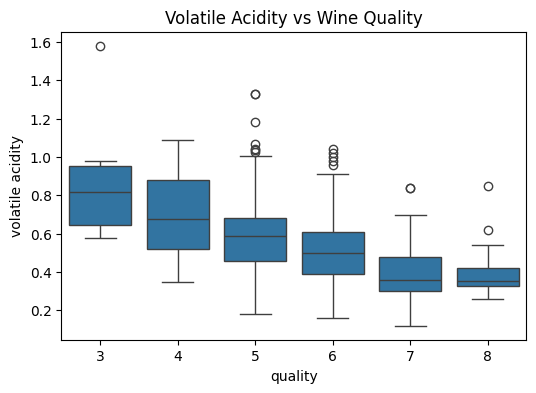

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="volatile acidity", data=df)
plt.title("Volatile Acidity vs Wine Quality")
plt.show()
